In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pd.set_option('display.max_columns',100)
# pd.set_option('display.max_rows',100)
sns.set(rc={'figure.figsize':(10,8)})

In [6]:
df = pd.read_csv("Data.csv",index_col=0)

In [7]:
df.columns

Index(['Survey Id', 'Keyword Id', 'Keyword Content', 'Country Of Origin Id',
       'Country Of Origin Label', 'Country Id', 'Country Label', 'Province Id',
       'Province Label', 'Age Group Id', 'Age Group Label', 'Gender Label',
       'Share Device', 'Mobile Type', 'Degree', 'Rank Pandemic',
       'Source Information Id', 'Source Information Label', 'Result Item Rank',
       'Result Item Title', 'Result Item Metadesc', 'Result Item Created At',
       'Result Item Full Url', 'Result Item Full Domain',
       'Google Tracked Country', 'Google Tracked Address',
       'Result Item Openrank', 'Keyword Openrank Average',
       'Survey Openrank Average', 'Html File'],
      dtype='object')

## How many surveys were taken from each age group?

C:\Users\ble\Miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (6).

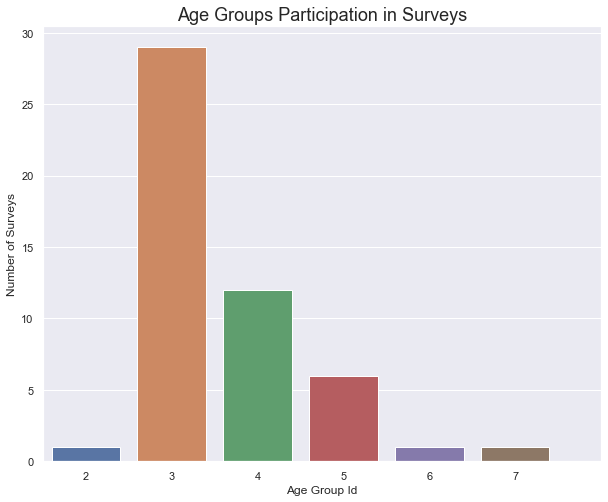

In [8]:
plt.figure(figsize=(10,8))
df1 = df.groupby("Survey Id")[["Age Group Id"]].agg("mean")
sns.countplot(df1["Age Group Id"])
plt.ylabel("Number of Surveys")
plt.title("Age Groups Participation in Surveys",fontsize=18)
plt.xticks([0,1,2,3,4,5,6],['18-24', '25-34','35-44','45-54','55-64','65+' ])
plt.show()

## Main source of information in most Surveys?

In [ ]:

df2 = df.groupby("Survey Id")[["Source Information Label"]].agg('max')
plt.figure(figsize=(10,8))
plt.pie(df2["Source Information Label"].value_counts().values,
       labels = df2["Source Information Label"].value_counts().index,
        autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title("Contribution of Different Sources in Covid-19 Information",fontsize=22)
plt.show()

## How people ranked pandemic?

In [ ]:
df3 = df.groupby("Survey Id")[["Rank Pandemic"]].agg("mean")
sns.countplot(df3["Rank Pandemic"])
plt.ylabel("Number of Surveys")
plt.title("Surveys Ranked by People",fontsize=18)
plt.show()

## How people of USA ranked Pandemic?

In [ ]:
df4 = df[df["Country Label"] == "United States"].groupby("Survey Id")[["Rank Pandemic"]].agg("mean")
sns.countplot(df4["Rank Pandemic"])
plt.ylabel("Number of Surveys")
plt.title("Surveys Ranked by People",fontsize=18)
plt.show()

## Male and Female participation in Survey?

In [ ]:

df5 = df.groupby("Survey Id")[["Gender Label"]].agg('max')
male_counts = df5[df5['Gender Label']=='male'].shape[0]
female_counts = df5[df5['Gender Label']=='female'].shape[0]

plt.title("Male and Female Participation in Surveys",fontsize=18)
plt.bar(["Male","Female"],[male_counts,female_counts])
plt.ylabel("Number of Surveys",fontsize=12)
plt.show()

## Relation of Share Device column with Gender Column?

In [ ]:
df6 = df.groupby("Survey Id")[["Gender Label","Share Device"]].agg('max')

plt.title("Relation between Share Device and Gender Column",fontsize=18)
sns.countplot(x="Gender Label",hue="Share Device",data=df6)
plt.ylabel("Device Count",fontsize=12)
plt.show()

## Did majority Collage Degree students ranked pandemic above 5?

In [ ]:
df7 = df[df["Degree"]=="College degree/bachelor’s degree"].groupby("Survey Id")[["Rank Pandemic"]].agg("max")
df7["above 5"] = None
df7.loc[df7["Rank Pandemic"] > 5,"above 5"] = 1
df7.loc[df7["Rank Pandemic"] <= 5,"above 5"] = 0
sns.countplot(df7["above 5"])
plt.title("Collage Degree Students Ranked Pandemic Above 5",fontsize=18)
plt.ylabel("Pandemic Ranked Above 5",fontsize=12)
plt.xticks([0,1],["Below 5","Above 5"])
plt.show()

## What is the Average Open Rank of Surveys?

In [ ]:
df8 = df.groupby("Survey Id")[["Survey Openrank Average"]].agg("max")
average_openrank_of_all_surveys = df8["Survey Openrank Average"].mean()
print("Average of Openrank of All Surveys is : {}".format(average_openrank_of_all_surveys))